<img style="float: left; margin: 35px 20px 20px 20px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Chelsi Sedano, Daniel García y Ana Paula Giusti

**Fecha:** 24 de marzo del 2020.

**Expediente** : 714509, 715989 y 714521

**Profesor:** Oscar David Jaramillo Zuluaga.


___

## 1. Entregable.

### 1.1 Simulación de COVID-19
> A lo largo del proyecto se simulará el comportamiento de la pandemia de la enfermedad del coronavirus (COVID-19), que se está enfrentando alrededor del mundo. Se simualará tomando diferentes variables y valores, para poder entender el impacto de esta pandemia y de las medidas preventivas que se están tomando al rededor del mundo.


### 1.2 Objetivos.
> #### 1.1 Objetivo general.

>  Simular el comportamiento del COVID-19 en México usando como referencia los caso de China, Italia y Brasil. 

> #### 1.2 Objetivos específicos

>  - Estimar la distribución de probabilidad de los datos a analizar.
>  - Calcular el número de infectados de COVID-19 para los siguientes 30 días.
>  - Calcular el número de muertos  para los siguientes 30 días.

### 1.3 Definición del problema.

Según la organización mundial de la salud la COVID-19 es la enfermedad infecciosa causada por el coronavirus que se ha descubierto más recientemente. Tanto el nuevo virus como la enfermedad eran desconocidos antes de que estallara el brote en Wuhan (China) en diciembre de 2019. 

Una persona puede contraer la COVID-19 por contacto con otra que esté infectada por el virus. La enfermedad puede propagarse de persona a persona a través de las gotículas procedentes de la nariz o la boca que salen despedidas cuando una persona infectada tose o exhala. Estas gotículas caen sobre los objetos y superficies que rodean a la persona, de modo que otras personas pueden contraer la COVID-19 si tocan estos objetos o superficies y luego se tocan los ojos, la nariz o la boca. También pueden contagiarse si inhalan las gotículas que haya esparcido una persona con COVID-19 al toser o exhalar. 

Analizar el comportamiento de COVID-19 en China, Italia y Brasil para realizar estimaciones de los próximos 30 días de el número de infectados, muertos y recuperados en México. Se eligen estos países como punto de referencia porque han sido relevantes durante la pandemia del 2020.

- China es el país donde se originó el virus y donde por largo tiempo tuvo el mayor número de casos, además podemos ver el cambio en el número de casos ante la imposición de las medidas de seguridad.

- Italia ya que el comportamiento de las personas ante la pandemia ha sido muy similar al caso de México. Al igual que en Italia las personas no están tomando las medidas suficientes que el gobierno y diferentes medios proponen para prevenir la propagación de este virus.

- Brasil se eligió debido a que es un país del continente Americano y el modo de ser de las personas es similar al de México.

Una vez teniendo las distribuciones de cada uno de los países a analizar se obtiene un índice de similitud con el fin de  predecir los objetivos anteriormente mencionados. 

Para llevar a cabo este análisis es necesario tener en cuenta los siguientes supuestos:

- Los casos se comportan igual a la distribución de probabilidad de cada país.
- Las medidas prevenivas son iguales para todos los países.

***********
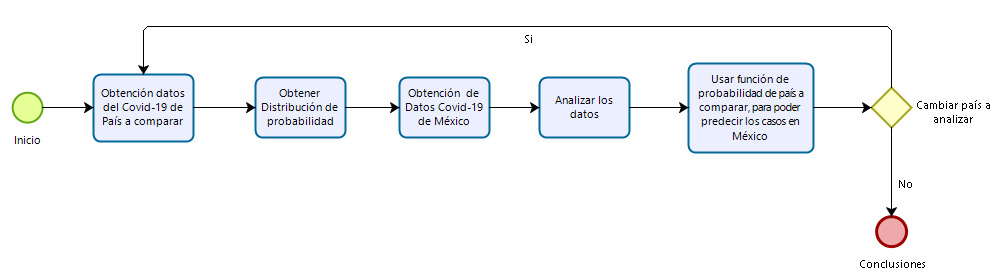


En el anterior diagrama se observan los pasos a realizar para obtener una simulación del comportamiento del COVID-19 en México.


### 1.4 Nodos y variables 

>  Los nodos o situaciones a analizar serán los diferentes países y en cada uno se van a analizar el número de personas que estan llevando a cabo los protocólos de seguridad o prevención de la propagación del virus impuestos por sus respectivos gobiernos con el fin de entender la importancia de que las personas sigan dichos protocólos.

### 1.5 Definición de hipótesis y supuestos.

**Hipótesis**

$H_1$: El comportamiento de México tiene mayor similitud al comportamiento de Italia que al de China o Brasil. 

$H_2$: Entre mayor sea el número de personas que tomen las medidas de seguridad , menor será el número de infectados en el país.

$H_3$: En el tiempo a analizar (30 días) el comportamiento del número de contagiados será exponencial.

**Supuestos**

- Los casos se comportan igual a la distribución de probabilidad de cada país.
- Las medidas prevenivas son iguales para todos los países.


### 1.6 Obtención de bases de datos

> La información que se utilizará para poder llevar a cabo el análisis será extraída del siguiente enlace.
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

> En dicha base de datos, podemos obtener el número de casos nuevos diarios, así como el número de muertos que hay en cada país. Dicha información es del 31/12/2019 al día de hoy.

> Otra fuente de información que se utilizará será la obtenida por el siguiente enlace.
https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/

> En dicho enlace de manera diaria se sube la actualización de la información del COVID-19. En dicha información podemos obtener por países: 

> - El número total de casos.
> - El número de nuevos casos.
> - El total de muertes.
> - Total de nuevas muertes.
> - La clasificación de la transmisión.
> - Días sin casos.

> Cabe recordar que cada uno de los campos anteriormente mencionados se presentan por cada país, y de manera diaria.

In [10]:
#Importar 
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
#Importando datos
covid_db = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', encoding="utf-8")
covid_db.head()



,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
1,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
3,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0


In [11]:
#Recuperar datos de los paises a anlizar
mexico = covid_db[covid_db['countriesAndTerritories'] == 'Mexico']
italy = covid_db[covid_db['countriesAndTerritories'] == 'Italy']
brazil = covid_db[covid_db['countriesAndTerritories'] == 'Brazil']
china = covid_db[covid_db['countriesAndTerritories'] == 'China']

In [12]:
#Solo tomar los dias que si tienen casos
mexico_infected = mexico[mexico['cases'] != 0]
italy_infected = italy[italy['cases'] != 0]
brazil_infected = brazil[brazil['cases'] != 0]
china_infected = china[china['cases'] != 0]

In [13]:
#los primeros treinta dias reportados con casos
mexico_30 = mexico_infected.iloc[:30,]
italy_30 = italy_infected.iloc[17:,]
brazil_30 = brazil_infected.iloc[4:,]
china_30 = china_infected.iloc[55:,]

In [14]:
#Obtener casos y murtes para cada país, para obtener correlaciones
cases_mexico = mexico_30['cases'].values
deaths_mexico = mexico_30['deaths'].values
cases_italy = italy_30['cases'].values
deaths_italy = italy_30['deaths'].values
cases_brazil = brazil_30['cases'].values
deaths_brazil = brazil_30['deaths'].values
cases_china = china_30['cases'].values
deaths_china = china_30['deaths'].values

In [15]:
#Correlacion de coeficiente de pearson (hace con datos normalizados)
#que tan iguales son las tasas de crecimiento en estos paises, crecen de igual manera aunque sean diferentes cantidades
#la correlacion no implica causalidad
from scipy.stats.stats import pearsonr
print(f"Correlation of cases Mexico - Italy: {pearsonr(cases_mexico,cases_italy)}")
print(f"Correlation of cases Mexico - Brazil: {pearsonr(cases_mexico,cases_brazil)}")
print(f"Correlation of cases Mexico - China: {pearsonr(cases_mexico,cases_china)}")

ValueError: operands could not be broadcast together with shapes (30,) (31,) 

In [45]:
#graficar los casos para ver que una tasa de crecimiento parecida no implica cantidad de casos iguales.
#en numeros de casos se parece más a brazil